SALES PREDICTION

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [55]:
sale_data = pd.read_csv('advertising.csv')
sale_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Data Preprocessing

In [56]:
sale_data.shape

(200, 4)

In [57]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [58]:
sale_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [59]:
sale_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [60]:
correlation = sale_data.corr()
correlation


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [61]:
X = sale_data[['TV', 'Radio', 'Newspaper']]
Y = sale_data['Sales']

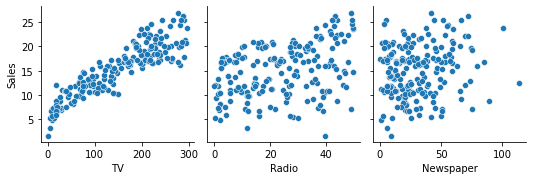

In [62]:
sns.pairplot(sale_data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

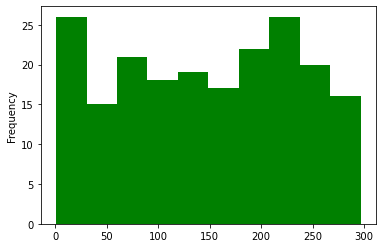

In [63]:
#for histogram plot of TV
sale_data['TV'].plot.hist(bins=10, color='green')
plt.show()

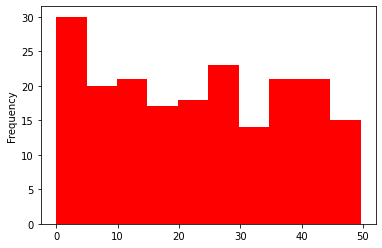

In [64]:
#for histogram plot of Radio
sale_data['Radio'].plot.hist(bins=10, color='Red')
plt.show()

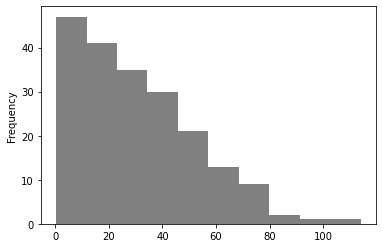

In [65]:
#for histogram plot of Newspaper
sale_data['Newspaper'].plot.hist(bins=10,color='Grey')
plt.show()

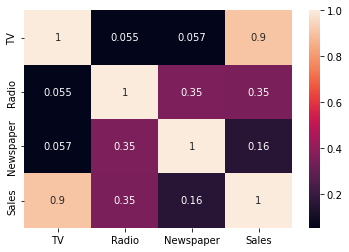

In [66]:
sns.heatmap(sale_data.corr(),annot=True)
plt.show()

# Splitting into train and test

In [67]:
 from sklearn.model_selection import train_test_split

X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=42)
X.shape,X_train.shape, x_test.shape

((200, 3), (160, 3), (40, 3))

# Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [69]:
X_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [70]:
mse = mean_squared_error(Y_test, X_test_prediction)
mse

2.4795382746308534

In [71]:
rmse = mean_squared_error(Y_test, X_test_prediction, squared=False)
rmse

1.5746549700270385

# Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf = RandomForestRegressor(random_state=5)
rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=5)

In [78]:
rf_test_predict =rf.predict(X_test)

In [79]:
rf_mse = mean_squared_error(Y_test, rf_test_predict)
rf_mse

0.46914414999999915

In [80]:
rf_mse = mean_squared_error(Y_test, rf_test_predict, squared=False)
rf_mse

0.6849409828591068

In [81]:
rf_r2 = r2_score(Y_test, rf_test_predict)
rf_r2

0.9830007399663003